# Micromagnetic standard problem 1

**Author**: Marijan Beg

**Date**: 10 May 2016

## Problem specification

The simulated sample is a thin film cuboid with dimensions:
- length $L_{x} =  2 \,\mu\text{m}$,
- width $L_{y} = 1 \,\mu\text{m}$, and
- thickness $t = 20 \,\text{nm}$.

The material parameters (similar to permalloy) are:

- exchange energy constant $A = 1.3 \times 10^{-11} \,\text{J/m}$,
- magnetisation saturation $M_\text{s} = 8 \times 10^{5} \,\text{A/m}$.

Apart from the symmetric exchange and demagnetisation energies, uniaxial anisotropy energy is also present with

- $K = 0.5 \times 10^{3} \,\text{J/m}^{3}$
- $(1, 0, 0)$ direction.

More details on standard problem 1 specifications can be found in Ref. 1.

## Simulation

In the first step, we define all simulation parameters.

In [1]:
import numpy as np

Lx = 2e-6  # x dimension of the sample(m)
Ly = 1e-6  # y dimension of the sample (m)
thickness = 20e-9  # sample thickness (m)
dx = dy = dz = 20e-9 # discretisation in x and y directions (m)

# Minimum sample coordinate.
cmin = (0, 0, 0)
# Maximum sample coordinate.
cmax = (Lx, Ly, thickness)
# Discretisation.
d = (dx, dy, dz)

mu0 = 4*np.pi*1e-7  # magnetic constant (H/m)

Ms = 8e5  # saturation magnetisation (A/m)
A = 1.3e-11  # exchange energy constant (J/m)
K = 0.5e3  # uniaxial anisotropy constant (J/m**3)
axis = (1, 0, 0)  # uniaxial anisotropy axis

After all required simulation parameters are defined, necessary modules are imported.

In [2]:
import sys

sys.path.append('../')

from sim import Sim
from atlases import BoxAtlas
from meshes import RectangularMesh
from energies.exchange import UniformExchange
from energies.demag import Demag
from energies.zeeman import FixedZeeman
from energies.anisotropy import UniaxialAnisotropy

Now, we can create atlas, mesh, and simulation objects.

In [3]:
# Create atlas object.
atlas = BoxAtlas(cmin, cmax)

# Create a mesh object.
mesh = RectangularMesh(atlas, d)

# Create a simulation object.
sim = Sim(mesh, Ms, name='standard_problem1')

In the next step, energy terms are added. We add symmetric exchange, demagnetisation, and Zeeman energies to the system's Hamiltonian. At this point, we add a Zeeman energy contribution with zero external magnetic field, but this value will be successivelly changed in the hysteresis loop simulation.

In [4]:
# Add exchange energy.
sim.add(UniformExchange(A))

# Add demagnetisation energy.
sim.add(Demag())

# Add uniaxial anisotropy energy.
sim.add(UniaxialAnisotropy(K, axis))

# Add Zeeman energy.
sim.add(FixedZeeman((0, 0, 0)))

The system is initialised in the $(10, 1, 0)$ direction [1].

In [5]:
sim.set_m((10, 1, 0))

Before the hysteresis simulations are carried out, external magnetic field values at which the system should be relaxed must be created.

In [6]:
Hmax = 50e-3/mu0
Hdirection = np.array([1, 0.017455065, 0])

n_steps = 51
H_array = np.concatenate((np.linspace(-Hmax, Hmax, n_steps), np.linspace(Hmax, -Hmax, n_steps)[1:]))

Finally, the system is relaxed at every external magnetic field value and average magnetisation is computed.

In [7]:
# Empty lists for saving average magnetisation.
mx_average = []
my_average = []
mz_average = []

for H in H_array:
    # Set external magnetic field.
    sim.set_H(H*Hdirection)
    
    # Relax the system.
    sim.relax()
    
    # Compute the average magnetisation.
    m_average = sim.m_average()
    
    # Append average magnetisation components.
    mx_average.append(sim.m_average()[0])
    my_average.append(sim.m_average()[1])
    mz_average.append(sim.m_average()[2])

## Hysteresis loop plot

After obtaining the average magnetisation at different external magnetic field values, hysteresis loop is plotted.

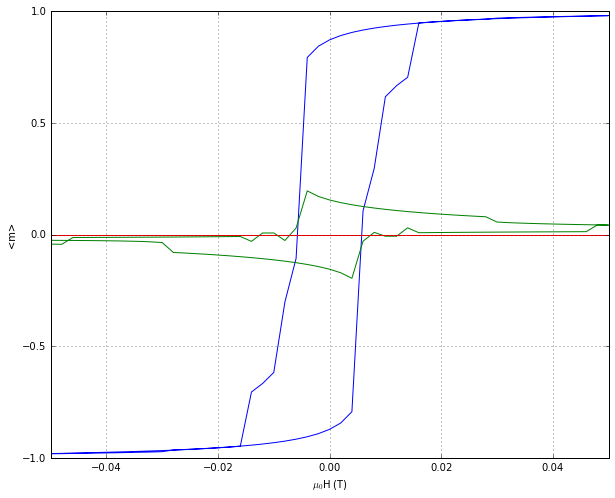

In [8]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,8))
plt.plot(H_array*mu0, mx_average, label='<mx>')
plt.plot(H_array*mu0, my_average, label='<my>')
plt.plot(H_array*mu0, mz_average, label='<mz>')
plt.xlim(-Hmax*mu0, Hmax*mu0)
plt.xlabel(r'$\mu_{0}$H (T)')
plt.ylabel('<m>')
plt.grid()

## References

[1] http://www.ctcms.nist.gov/~rdm/mumag.org.html